In [1]:
import numpy as np
import tensorflow as tf
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
from __future__ import division
import pandas as pd

In [2]:
data = pd.read_excel('../data/fire_theft.xls')
n_instances = len(data)
n_features = 1

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
data.head()

,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


### Problem4: Implement SGD

step:0, theta0=0.012, theta1=0.041, cost=803.056
step:2000, theta0=6.832, theta1=1.062, cost=272.521
step:4000, theta0=10.972, theta1=2.189, cost=228.357
step:6000, theta0=13.191, theta1=3.314, cost=596.073
step:8000, theta0=15.709, theta1=1.439, cost=181.173
step:10000, theta0=15.988, theta1=3.013, cost=523.599
step:12000, theta0=16.022, theta1=0.962, cost=200.780
step:14000, theta0=16.210, theta1=0.801, cost=218.942
step:16000, theta0=16.780, theta1=0.716, cost=227.119
step:18000, theta0=16.369, theta1=0.856, cost=210.628
step:20000, theta0=16.535, theta1=1.063, cost=189.908
step:22000, theta0=16.856, theta1=1.200, cost=182.240
step:24000, theta0=17.012, theta1=1.324, cost=180.427
step:26000, theta0=16.472, theta1=1.492, cost=183.398
step:28000, theta0=16.460, theta1=0.728, cost=227.845


/Users/80151/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/80151/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


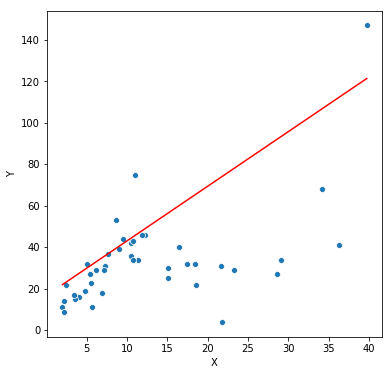

In [4]:
X = tf.placeholder(name='X', dtype=tf.float32)
Y = tf.placeholder(name='Y', dtype=tf.float32)

theta0 = tf.Variable(0.0, name='theta0')
theta1 = tf.Variable(0.0, name='theta1')

y_pred = theta0 + theta1*X

cost_function = (1.0/ (2.0 * n_instances)) * tf.reduce_sum(tf.pow((y_pred - Y), 2))
cost_summary = tf.summary.scalar(tensor=cost_function, name='sgd_cost_summary')

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.03).minimize(cost_function)

all_instance_feed_dict = {
    X : data['X'].values,
    Y : data['Y'].values
}

with tf.Session() as sess:
    writer = tf.summary.FileWriter('graphs/lab_problem4_5/')
    sess.run(tf.global_variables_initializer())
    
    for step in range(30000):
        random_index = np.random.choice(n_instances)
        random_x = data.iloc[random_index]['X']
        random_y = data.iloc[random_index]['Y']

        random_instance_feed_dict = {
            X : random_x,
            Y : random_y
        }

        sess.run(optimizer, random_instance_feed_dict)
        summary = sess.run(cost_summary, all_instance_feed_dict)
        writer.add_summary(summary, step)

        if(step % 2000 == 0):
            tt0 = sess.run(theta0)
            tt1 = sess.run(theta1)
            cost = sess.run(cost_function, all_instance_feed_dict)
            print(f"step:{step}, theta0={tt0:.3f}, theta1={tt1:.3f}, cost={cost:.3f}")
    plt.figure(figsize=(6,6))
    sns.scatterplot(data['X'], data['Y'])
    sns.lineplot(data['X'], sess.run(y_pred, all_instance_feed_dict), c='r')
    plt.show()
    
writer.close()

### Problem5: Mini-batch Gradient Descent(50 training instances)

step:0, theta0:0.038, theta1:0.528, cost=571.079
step:2000, theta0:9.826, theta1:1.553, cost=191.535
step:4000, theta0:13.998, theta1:1.397, cost=182.604
step:6000, theta0:15.680, theta1:1.317, cost=181.219
step:8000, theta0:16.405, theta1:1.454, cost=182.016
step:10000, theta0:16.758, theta1:1.199, cost=182.438
step:12000, theta0:17.019, theta1:1.449, cost=182.773
step:14000, theta0:17.134, theta1:1.296, cost=180.429
step:16000, theta0:17.104, theta1:1.388, cost=181.213
step:18000, theta0:16.897, theta1:1.072, cost=188.071
step:20000, theta0:16.961, theta1:1.534, cost=186.471
step:22000, theta0:17.077, theta1:1.220, cost=181.411
step:24000, theta0:17.079, theta1:1.667, cost=196.558
step:26000, theta0:17.040, theta1:1.162, cost=183.218
step:28000, theta0:17.088, theta1:1.130, cost=184.457


/Users/80151/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/80151/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


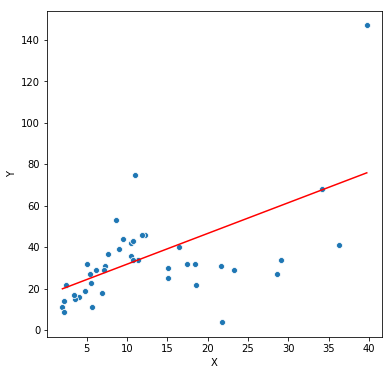

In [5]:
X = tf.placeholder(name='X', dtype=tf.float32)
Y = tf.placeholder(name='Y', dtype=tf.float32)

theta0 = tf.Variable(0.0, name='theta0')
theta1 = tf.Variable(0.0, name='theta1')

y_pred = theta0 + theta1*X

cost_function = (1.0/(2.0*n_instances)) * tf.reduce_sum(tf.pow(y_pred - Y, 2))
cost_summary = tf.summary.scalar(tensor=cost_function, name='mini_batch_gd_cost_summary')

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost_function)

all_instance_feed_dict = {
    X : data['X'].values,
    Y : data['Y'].values
}
with tf.Session() as sess:
    writer = tf.summary.FileWriter('graphs/lab_problem4_5/')
    sess.run(tf.global_variables_initializer())
    
    for step in range(30000):
        random_indices = np.random.choice(n_instances, 50)
        train_instances_feed_dict = {
            X : data.iloc[random_indices]['X'].values,
            Y : data.iloc[random_indices]['Y'].values
        }
        
        sess.run(optimizer, train_instances_feed_dict)
        
        summary = sess.run(cost_summary, all_instance_feed_dict)
        writer.add_summary(summary, step)
        
        if(step % 2000 == 0):
            tt0 = sess.run(theta0)
            tt1 = sess.run(theta1)
            cost = sess.run(cost_function, all_instance_feed_dict)
            print(f"step:{step}, theta0:{tt0:.3f}, theta1:{tt1:.3f}, cost={cost:.3f}")
            
    plt.figure(figsize=(6,6))
    sns.scatterplot(data['X'], data['Y'])
    sns.lineplot(data['X'], sess.run(y_pred, all_instance_feed_dict), c='r')
    plt.show()